In [ ]:
import pandas as pd
from datetime import datetime, date
import seaborn as sns

In [ ]:
!pip install pycaret[full]

In [ ]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
df_final = pd.read_excel("/content/df_final.xlsx", sheet_name="Sheet1")


In [ ]:
df_train = pd.read_excel("/content/df_train.xlsx", sheet_name="df_train")


In [ ]:
df_train['record'][:1]

0    入院情况:患者因"头晕10余年，再发伴头痛1天。"入院。专科情况：T 36.8℃，P65次/...
Name: record, dtype: object

In [ ]:
df_final.head()

,Code,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,note_复方血栓通胶囊,...,diag_颈动脉硬化,diag_高脂血症,diag_视网膜病变,diag_视网膜动静脉阻塞,AdmissionT,DischargeT,Gender,Age,Dept1,Dept2
0,20210522-000093,-0.005087,0.000302,-0.000012,6.103836e-07,0.000002,5.966692e-07,0.000008,0.000002,1,...,0,0,0,0,2021-05-22 17:13:10,2021-05-27 11:08:13,male,41,心血管内科二区,心血管内科二区
1,20191031-000063,-0.006083,0.000799,-0.000059,6.000947e-07,-0.000022,-1.718871e-06,0.000001,-0.000005,0,...,0,0,1,0,2019-10-31 10:29:19,2019-11-06 11:04:21,male,76,眼科,眼科
2,20191116-000129,-0.008840,-0.000125,0.000042,-4.630815e-06,0.000003,9.958944e-06,-0.000008,0.000002,1,...,1,0,0,0,2019-11-16 22:24:42,2019-11-24 11:27:16,male,66,神经内科,神经内科
3,20210531-000115,-0.011146,-0.000152,0.000072,-6.825669e-06,-0.000001,9.259969e-06,0.000003,-0.000002,1,...,0,0,0,0,2021-06-02 08:01:54,2021-06-03 09:48:40,male,61,心血管内科二区,心血管内科二区
4,20191128-000036,-0.000803,-0.000649,0.000059,1.097117e-05,-0.000014,1.204253e-05,0.000008,0.000002,1,...,0,0,1,0,2019-11-28 09:19:11,2019-12-06 11:30:14,male,42,内分泌科,内分泌科


In [ ]:
df_0 = pd.read_excel("/content/data_0.xlsx", sheet_name="Sheet1")
df_reg = pd.read_excel("/content/住院登记.xlsx", sheet_name="住院登记")


In [ ]:
df_reg.columns

Index(['住院序号本次住院就诊编码', '入院科室', '出院科室', '入院时间', '出院时间', '医保类型', '性别', '出生年月',
       '职业', '入院情况', '诊疗经过', '出院情况'],
      dtype='object')

In [ ]:
df_reg_0 = df_reg[['住院序号本次住院就诊编码','入院时间', '出院时间','性别', '出生年月','入院科室', '出院科室']]

In [ ]:
df_reg_0.head()

,住院序号本次住院就诊编码,入院时间,出院时间,性别,出生年月,入院科室,出院科室
0,20100502-000012,2010-05-02 08:34:46,2010-05-10 10:45:45,女,1936.08,骨科,骨科
1,20120601-000075,2012-06-01 15:47:16,2012-06-11 11:42:24,女,1963.03,眼科,眼科
2,20120604-000049,2012-06-04 09:51:55,2012-06-18 10:15:44,男,1931.09,综合一科,综合一科
3,20120618-000026,2012-06-18 08:31:23,2012-06-25 10:29:48,女,1951.11,综合一科,综合一科
4,20120702-000048,2012-07-02 09:20:25,2012-07-15 10:21:27,男,1968.06,内分泌科,内分泌科


In [ ]:
df_merge = pd.merge(df_0, df_reg_0, on='住院序号本次住院就诊编码', how='inner')
df_merge.shape

(908, 26)

In [ ]:
df_merge.columns

Index(['住院序号本次住院就诊编码', 'Text', 'Feature0', 'Feature1', 'Feature2', 'Feature3',
       'Feature4', 'Feature5', 'Feature6', 'Feature7', 'note_复方血栓通胶囊',
       'note_注射剂', 'diag_冠状动脉粥样硬化性心脏病', 'diag_后循环缺血', 'diag_大脑动脉粥样硬化',
       'diag_颈内动脉粥样硬化', 'diag_颈动脉硬化', 'diag_高脂血症', 'diag_视网膜病变',
       'diag_视网膜动静脉阻塞', '入院时间', '出院时间', '性别', '出生年月', '入院科室', '出院科室'],
      dtype='object')

In [ ]:
train_1 = df_pred[['Feature0', 'Feature1', 'Feature2', 'Feature3',
       'Feature4', 'Feature5', 'Feature6', 'Feature7', 'note_复方血栓通胶囊']]

In [ ]:
exp_1 = setup(data = train_1, target = 'note_复方血栓通胶囊', session_id=123, fix_imbalance=True)

In [ ]:
df_pred.columns

Index(['Unnamed: 0', 'Text', '预测1', '预测2', '预测3', '预测4', '预测5', '预测6', '预测7',
       '预测8', '预测9', '预测10', 'Feature0', 'Feature1', 'Feature2', 'Feature3',
       'Feature4', 'Feature5', 'Feature6', 'Feature7', 'note_复方血栓通胶囊',
       'note_注射剂', 'diag_冠状动脉粥样硬化性心脏病', 'diag_后循环缺血', 'diag_大脑动脉粥样硬化',
       'diag_颈内动脉粥样硬化', 'diag_颈动脉硬化', 'diag_高脂血症', 'diag_视网膜病变',
       'diag_视网膜动静脉阻塞'],
      dtype='object')

# 6-16 note

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df_trend = pd.read_excel("/content/趋势大表.xlsx", sheet_name="Sheet1")
df_trend.shape

(2104, 47)

In [ ]:
df_trend['患者编号'].nunique()

86

In [ ]:
df_ccc = pd.read_excel("/content/ccc.xlsx", sheet_name="Sheet1")
df_reg = pd.read_excel("/content/住院登记.xlsx", sheet_name="住院登记")
df_diagnosis = pd.read_excel("/content/住院诊断.xlsx", sheet_name="住院诊断")
df_notice = pd.read_excel("/content/住院医嘱.xlsx", sheet_name="住院医嘱")


In [ ]:
sub_ccc = df_ccc[['P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'P8', '年龄', '性别', '住院序号本次住院就诊编码']]

In [ ]:
# filter df_diag
# filter by 诊断名称
lst_swm = ['2型糖尿病性视网膜病变',
           '高血压性视网膜病变',
           '中心性浆液性脉络膜视网膜病变',
           '视网膜分支静脉阻塞', '视网膜中央动脉阻塞', 
           '视网膜静脉阻塞', '视网膜中心性静脉阻塞', '视网膜动脉粥样硬化', '视网膜分支动脉阻塞']
lst_ves = ['冠状动脉粥样硬化性心脏病', '高脂血症', '颈动脉硬化','大脑动脉粥样硬化','后循环缺血','颈内动脉粥样硬化']


diag_0 = df_diagnosis[[ '住院序号本次住院就诊编码', '诊断类型', '诊断名称']]
diag_1 = diag_0[ diag_0['诊断名称'].isin(lst_swm + lst_ves) ]
diag_2 = diag_1.drop(columns=['诊断名称', '诊断类型'])
df_encoded = pd.get_dummies(diag_1['诊断名称'], prefix='diag')
diag_3 = pd.concat([diag_2, df_encoded], axis="columns")
diag_4 = diag_3.groupby('住院序号本次住院就诊编码').sum()
diag_final = diag_4 # 492 rows

In [ ]:
# filter by df_notice
notice_0 = df_notice.dropna()
notice_0 = notice_0[ notice_0['项目种类'].isin(['中成药']) ]

notice_0 = notice_0[[ '住院序号本次住院就诊编码', '药品名称']]

notice_1 = notice_0[notice_0['药品名称'].str.contains("复方血栓通胶囊") ]
notice_2 = notice_0[notice_0['药品名称'].str.contains("注射") ]

lst_t1 = ['复方血栓通胶囊']*notice_1.shape[0]
lst_t2 = ['注射剂']*notice_2.shape[0]

notice_1.insert(2, "prescription", lst_t1, True)
notice_2.insert(2, "prescription", lst_t2, True)

notice_3 = pd.concat([notice_1, notice_2])

notice_3 = notice_3[[ '住院序号本次住院就诊编码', 'prescription']]

note_encoded = pd.get_dummies(notice_3['prescription'], prefix='note')
notice_4 = pd.concat([notice_3, note_encoded], axis="columns")

notice_4 = notice_4[[ '住院序号本次住院就诊编码', 'note_复方血栓通胶囊', 'note_注射剂']]

notice_5 = notice_4.groupby('住院序号本次住院就诊编码').sum()

# notice_5['note_复方血栓通胶囊'].where(notice_5['note_复方血栓通胶囊'] > 0, 1, inplace=True)
# notice_5['note_注射剂'].where(notice_5['note_注射剂'] > 0, 1, inplace=True)

notice_5['note_复方血栓通胶囊'].values[notice_5['note_复方血栓通胶囊'] > 0] = 1
notice_5['note_注射剂'].values[notice_5['note_注射剂'] > 0] = 1
final_note = notice_5 # 3849 rows

In [ ]:
df_reg.columns

Index(['住院序号本次住院就诊编码', '入院科室', '出院科室', '入院时间', '出院时间', '医保类型', '性别', '出生年月',
       '职业', '入院情况', '诊疗经过', '出院情况'],
      dtype='object')

In [ ]:
# reg
reg_0 = df_reg[['住院序号本次住院就诊编码', '入院情况', '诊疗经过']].dropna()

# notice_0 = df_notice.dropna()

print(reg_0.shape)
reg_0.head()


(2818, 3)


,住院序号本次住院就诊编码,入院情况,诊疗经过
2454,20190809-000096,入院情况:患者张绪初，男，63岁。因“反复失语3天，再发伴右侧肢体乏力半小时”入院。体温36...,诊治经过：入院后完善相关检查，查K+ 3.48mmol/L。肾功：CREA 116.4umo...
2479,20190815-000024,"入院情况：患者因""维持血液透析1月余""入院。专科情况：右侧颈部可见一临时血液透析导管,管周皮...","诊治经过：入院后完善相关检查,血常规:白细胞数(WBC) 8.90(×10E9/L),血红蛋..."
2493,20190819-000058,"入院情况:患者因""反复颈部疼痛不适1月余""入院。入院查体:颈软，无抵抗，C3-C7棘突间及其...",诊治经过：患者入院后完善各相关检查，血脂示:总胆固醇（CHOL） 6.79(mmol/L)↑...
2494,20190819-000071,"入院情况:患者因""反复腰部疼痛3年余，双下肢疼痛、麻木2年加重1周""入院。专科情况：颈软，无...",诊治经过：入院后完善相关检查，腰椎MR示：腰椎间盘变性，腰2/3椎间盘局部向右后突出，腰3/...
2542,20190901-000022,"入院情况:患者因""反复腹胀、腹痛1年余，再发1月""入院。查体：神志清，全身皮肤粘膜无黄染，呼...",诊治经过：入院后查心电图示STT改变请结合临床。胸片示老年性心肺改变，胸椎轻度向右侧弯。全腹...


In [ ]:
# merge with inner join on 住院序号本次住院就诊编码
ccc_reg= pd.merge(sub_ccc, reg_0, on='住院序号本次住院就诊编码', how='inner')
ccc_reg_note= pd.merge(ccc_reg, final_note, on='住院序号本次住院就诊编码', how='inner')
ccc_reg_note_diag = pd.merge(ccc_reg_note, diag_final, on='住院序号本次住院就诊编码', how='inner')


In [ ]:
lst_tgt = ['note_复方血栓通胶囊', 'note_注射剂', 'diag_2型糖尿病性视网膜病变',
       'diag_中心性浆液性脉络膜视网膜病变', 'diag_冠状动脉粥样硬化性心脏病', 'diag_后循环缺血',
       'diag_大脑动脉粥样硬化', 'diag_视网膜中央动脉阻塞', 'diag_视网膜中心性静脉阻塞', 'diag_视网膜分支动脉阻塞',
       'diag_视网膜分支静脉阻塞', 'diag_视网膜动脉粥样硬化', 'diag_视网膜静脉阻塞', 'diag_颈内动脉粥样硬化',
       'diag_颈动脉硬化', 'diag_高脂血症', 'diag_高血压性视网膜病变']
for tgt in lst_tgt:
    ccc_reg_note_diag[tgt].values[ccc_reg_note_diag[tgt] > 0] = 1


In [ ]:
ccc_reg_note_diag['diag_视网膜病变'] = ccc_reg_note_diag['diag_2型糖尿病性视网膜病变'] + ccc_reg_note_diag['diag_中心性浆液性脉络膜视网膜病变'] + ccc_reg_note_diag['diag_高血压性视网膜病变']
ccc_reg_note_diag['diag_视网膜动静脉阻塞'] = ccc_reg_note_diag['diag_视网膜中央动脉阻塞'] + ccc_reg_note_diag['diag_视网膜中心性静脉阻塞'] + ccc_reg_note_diag['diag_视网膜分支动脉阻塞'] + ccc_reg_note_diag['diag_视网膜分支静脉阻塞'] + ccc_reg_note_diag['diag_视网膜动脉粥样硬化'] + ccc_reg_note_diag['diag_视网膜静脉阻塞']

In [ ]:
lst_tgt_1 = ['note_复方血栓通胶囊', 'note_注射剂', 'diag_冠状动脉粥样硬化性心脏病', 'diag_后循环缺血',
       'diag_大脑动脉粥样硬化',  'diag_颈内动脉粥样硬化',
       'diag_颈动脉硬化', 'diag_高脂血症',  'diag_视网膜病变',
       'diag_视网膜动静脉阻塞']
for tgt in lst_tgt_1:
    ccc_reg_note_diag[tgt].values[ccc_reg_note_diag[tgt] > 0] = 1

In [ ]:
for tgt in lst_tgt_1:
    print(f'{ccc_reg_note_diag[tgt].value_counts()}')

1    760
0    148
Name: note_复方血栓通胶囊, dtype: int64
1    579
0    329
Name: note_注射剂, dtype: int64
1    505
0    403
Name: diag_冠状动脉粥样硬化性心脏病, dtype: int64
0    828
1     80
Name: diag_后循环缺血, dtype: int64
0    776
1    132
Name: diag_大脑动脉粥样硬化, dtype: int64
0    831
1     77
Name: diag_颈内动脉粥样硬化, dtype: int64
0    803
1    105
Name: diag_颈动脉硬化, dtype: int64
0    564
1    344
Name: diag_高脂血症, dtype: int64
0    842
1     66
Name: diag_视网膜病变, dtype: int64
0    879
1     29
Name: diag_视网膜动静脉阻塞, dtype: int64


In [ ]:
df_train = ccc_reg_note_diag[['住院序号本次住院就诊编码','P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', '年龄', '性别',
        '入院情况', '诊疗经过', 'note_复方血栓通胶囊', 'note_注射剂', 
       'diag_冠状动脉粥样硬化性心脏病', 'diag_后循环缺血',
       'diag_大脑动脉粥样硬化',  'diag_颈内动脉粥样硬化',
       'diag_颈动脉硬化', 'diag_高脂血症',  'diag_视网膜病变',
       'diag_视网膜动静脉阻塞']]


In [ ]:
df_train.columns

Index(['住院序号本次住院就诊编码', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', '年龄',
       '性别', '入院情况', '诊疗经过', 'note_复方血栓通胶囊', 'note_注射剂', 'diag_冠状动脉粥样硬化性心脏病',
       'diag_后循环缺血', 'diag_大脑动脉粥样硬化', 'diag_颈内动脉粥样硬化', 'diag_颈动脉硬化',
       'diag_高脂血症', 'diag_视网膜病变', 'diag_视网膜动静脉阻塞'],
      dtype='object')

In [ ]:
df_train.to_csv('df_train.csv')

# pycaret training

'diag_后循环缺血', 'diag_大脑动脉粥样硬化',
       'diag_颈内动脉粥样硬化', 'diag_颈动脉硬化', 'diag_高脂血症', 'diag_视网膜病变',
       'diag_视网膜动静脉阻塞'

# diag_后循环缺血

In [ ]:
df = df_final[['diag_后循环缺血', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]

exp = setup(data = df, target = 'diag_后循环缺血', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

In [ ]:
top5 = compare_models(n_select = 5, sort="MCC") 


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7827,0.0000,0.8051,0.2916,0.4279,0.3281,0.3932,0.020
lda,Linear Discriminant Analysis,0.7811,0.8589,0.8051,0.2897,0.4259,0.3256,0.3911,0.022
lr,Logistic Regression,0.8010,0.8610,0.7551,0.3054,0.4337,0.3386,0.3908,0.032
nb,Naive Bayes,0.7729,0.8072,0.7397,0.2763,0.3998,0.2961,0.3515,0.022
svm,SVM - Linear Kernel,0.7712,0.0000,0.7410,0.2722,0.3967,0.2920,0.3486,0.024
knn,K Neighbors Classifier,0.7778,0.7813,0.7077,0.2788,0.3983,0.2948,0.3422,0.146
gbc,Gradient Boosting Classifier,0.8392,0.8072,0.3782,0.2872,0.3232,0.2357,0.2395,0.260
dt,Decision Tree Classifier,0.8375,0.6325,0.3756,0.2781,0.3160,0.2271,0.2322,0.030
ada,Ada Boost Classifier,0.8093,0.7707,0.4115,0.2418,0.3042,0.2025,0.2122,0.142
catboost,CatBoost Classifier,0.8425,0.8233,0.3295,0.2646,0.2890,0.2025,0.2063,5.508


In [ ]:
for item in top5:
    predict_model(item)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7619,0.7693,0.7778,0.1867,0.3011,0.2179,0.2994


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7619,0.8597,0.7778,0.1867,0.3011,0.2179,0.2994


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7692,0.8647,0.7778,0.1918,0.3077,0.2258,0.3064


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7839,0.8135,0.7778,0.2029,0.3218,0.2426,0.321


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7289,0.8033,0.8889,0.1818,0.3019,0.2161,0.3221


In [ ]:
# evaluate_model(top5[2])
evaluate_model(top5[3])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# diag_大脑动脉粥样硬化

In [ ]:
df = df_final[['diag_大脑动脉粥样硬化', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]

exp = setup(data = df, target = 'diag_大脑动脉粥样硬化', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

,Description,Value
0,session_id,123
1,Target,diag_大脑动脉粥样硬化
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(908, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5 = compare_models(n_select = 5, sort="MCC") 


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6783,0.7106,0.6327,0.2537,0.3620,0.1966,0.2333,0.024
ridge,Ridge Classifier,0.6766,0.0000,0.6327,0.2526,0.3609,0.1949,0.2317,0.020
lr,Logistic Regression,0.6750,0.7100,0.6209,0.2489,0.3553,0.1881,0.2233,0.032
catboost,CatBoost Classifier,0.8125,0.7134,0.3105,0.3409,0.3242,0.2159,0.2165,4.820
rf,Random Forest Classifier,0.8142,0.7022,0.2758,0.3348,0.3018,0.1958,0.1974,0.652
gbc,Gradient Boosting Classifier,0.7810,0.6918,0.3549,0.2885,0.3178,0.1891,0.1908,0.274
knn,K Neighbors Classifier,0.6401,0.6367,0.6203,0.2281,0.3333,0.1548,0.1903,0.146
xgboost,Extreme Gradient Boosting,0.8075,0.6906,0.2739,0.3091,0.2879,0.1781,0.1794,0.472
ada,Ada Boost Classifier,0.7230,0.6785,0.4575,0.2462,0.3199,0.1644,0.1778,0.144
lightgbm,Light Gradient Boosting Machine,0.8092,0.6964,0.2634,0.3137,0.2825,0.1748,0.1771,0.132


In [ ]:
for item in top5:
    predict_model(item)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7729,0.7909,0.7619,0.381,0.5079,0.381,0.4196


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7729,0.7684,0.7619,0.381,0.5079,0.381,0.4196


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7766,0.788,0.7381,0.3827,0.5041,0.378,0.412


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8059,0.6855,0.1667,0.28,0.209,0.1064,0.111


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8022,0.7118,0.1905,0.2857,0.2286,0.1203,0.1236


In [ ]:
evaluate_model(top5[0])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# diag_颈内动脉粥样硬化

In [ ]:
df = df_final[['diag_颈内动脉粥样硬化', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]

exp = setup(data = df, target = 'diag_颈内动脉粥样硬化', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

In [ ]:
top5_6 = compare_models(n_select = 5, sort="MCC") 


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7677,0.8258,0.8121,0.2801,0.4127,0.3139,0.3814,0.146
qda,Quadratic Discriminant Analysis,0.8225,0.7561,0.5697,0.3126,0.4000,0.3117,0.3298,0.026
et,Extra Trees Classifier,0.9038,0.8022,0.2591,0.5067,0.3394,0.2936,0.3146,0.548
catboost,CatBoost Classifier,0.8922,0.8063,0.3106,0.4228,0.3571,0.3000,0.3047,4.494
rf,Random Forest Classifier,0.8988,0.7874,0.2758,0.4635,0.3399,0.2897,0.3039,0.652
lightgbm,Light Gradient Boosting Machine,0.8906,0.7852,0.3121,0.4102,0.3520,0.2939,0.2983,0.262
xgboost,Extreme Gradient Boosting,0.8806,0.7950,0.3106,0.3572,0.3321,0.2670,0.2678,0.480
gbc,Gradient Boosting Classifier,0.8673,0.7691,0.3121,0.3269,0.3145,0.2426,0.2447,0.288
dt,Decision Tree Classifier,0.8292,0.6072,0.3318,0.2318,0.2706,0.1781,0.1828,0.028
ridge,Ridge Classifier,0.6118,0.0000,0.6167,0.1488,0.2389,0.0991,0.1399,0.022


In [ ]:
for item in top5_6:
    predict_model(item)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7656,0.7709,0.7059,0.169,0.2727,0.1915,0.2619


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8242,0.7273,0.4706,0.1702,0.25,0.1745,0.2037


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9487,0.8556,0.2941,0.7143,0.4167,0.3947,0.4377


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9304,0.7914,0.2353,0.4,0.2963,0.2623,0.2725


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9304,0.8276,0.2941,0.4167,0.3448,0.3092,0.3145


In [ ]:
evaluate_model(top5_6[2])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# diag_颈动脉硬化

In [ ]:
df = df_final[['diag_颈动脉硬化', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]

exp = setup(data = df, target = 'diag_颈动脉硬化', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

,Description,Value
0,session_id,123
1,Target,diag_颈动脉硬化
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(908, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5 = compare_models(n_select = 5, sort="MCC") 


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7197,0.7466,0.6825,0.2636,0.3791,0.2417,0.2891,1.490
ridge,Ridge Classifier,0.7130,0.0000,0.6825,0.2593,0.3746,0.2350,0.2827,0.038
lda,Linear Discriminant Analysis,0.7130,0.7457,0.6825,0.2593,0.3746,0.2350,0.2827,0.056
nb,Naive Bayes,0.7130,0.7138,0.6442,0.2524,0.3609,0.2203,0.2618,0.044
svm,SVM - Linear Kernel,0.6966,0.0000,0.6567,0.2432,0.3542,0.2086,0.2523,0.036
xgboost,Extreme Gradient Boosting,0.8274,0.7576,0.3550,0.3301,0.3366,0.2394,0.2421,0.468
lightgbm,Light Gradient Boosting Machine,0.8224,0.7582,0.3417,0.2935,0.3112,0.2108,0.2142,0.264
ada,Ada Boost Classifier,0.7577,0.6738,0.4725,0.2518,0.3260,0.1955,0.2117,0.320
rf,Random Forest Classifier,0.8308,0.7602,0.3025,0.3134,0.3029,0.2081,0.2104,0.872
catboost,CatBoost Classifier,0.8191,0.7536,0.3158,0.2920,0.3002,0.1972,0.1992,4.258


In [ ]:
for item in top5:
    predict_model(item)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7656,0.7182,0.6071,0.2429,0.3469,0.2348,0.2715


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7509,0.7031,0.6429,0.2368,0.3462,0.2309,0.2749


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7509,0.7278,0.6429,0.2368,0.3462,0.2309,0.2749


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7399,0.7159,0.6071,0.2208,0.3238,0.2041,0.2442


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7692,0.7449,0.7143,0.2667,0.3883,0.2809,0.3329


In [ ]:
evaluate_model(top5[4])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# diag_高脂血症

In [ ]:
df = df_final[['diag_高脂血症', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]

exp = setup(data = df, target = 'diag_高脂血症', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

In [ ]:
top5 = compare_models(n_select = 5, sort="MCC") 


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5655,0.5826,0.6091,0.4327,0.5052,0.1375,0.1444,0.024
catboost,CatBoost Classifier,0.5970,0.5961,0.4273,0.4471,0.4360,0.1232,0.1236,3.872
knn,K Neighbors Classifier,0.5638,0.5671,0.5591,0.4255,0.4828,0.1176,0.1212,0.146
xgboost,Extreme Gradient Boosting,0.5919,0.5718,0.4409,0.4427,0.4408,0.1201,0.1203,0.456
lightgbm,Light Gradient Boosting Machine,0.5920,0.5767,0.4273,0.4425,0.4337,0.1155,0.1159,0.216
lr,Logistic Regression,0.5539,0.5780,0.5227,0.4126,0.4607,0.0894,0.0914,1.338
ridge,Ridge Classifier,0.5522,0.0000,0.5273,0.4122,0.4621,0.0887,0.0906,0.020
svm,SVM - Linear Kernel,0.5274,0.0000,0.6000,0.3965,0.4752,0.0745,0.0850,0.024
lda,Linear Discriminant Analysis,0.5455,0.5787,0.5091,0.4038,0.4499,0.0719,0.0731,0.024
rf,Random Forest Classifier,0.5853,0.5692,0.3455,0.4154,0.3737,0.0705,0.0712,0.746


In [ ]:
evaluate_model(top5[0])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# diag_视网膜病变

In [ ]:
df = df_final[['diag_视网膜病变', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]

exp = setup(data = df, target = 'diag_视网膜病变', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

In [ ]:
top5 = compare_models(n_select = 5, sort="MCC") 


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.7612,0.0000,0.7028,0.1865,0.2928,0.2072,0.2729,0.028
lr,Logistic Regression,0.7928,0.8175,0.6111,0.1849,0.2830,0.2000,0.2507,0.966
ridge,Ridge Classifier,0.7712,0.0000,0.6361,0.1708,0.2687,0.1817,0.2401,0.020
lda,Linear Discriminant Analysis,0.7712,0.8176,0.6361,0.1708,0.2687,0.1817,0.2401,0.024
knn,K Neighbors Classifier,0.8026,0.7590,0.5639,0.1871,0.2802,0.1984,0.2394,0.146
nb,Naive Bayes,0.7381,0.6801,0.5667,0.1431,0.2261,0.1324,0.1797,0.026
catboost,CatBoost Classifier,0.8938,0.7898,0.2194,0.2188,0.2169,0.1618,0.1621,4.268
ada,Ada Boost Classifier,0.8192,0.6813,0.3389,0.1422,0.1998,0.1160,0.1310,0.150
xgboost,Extreme Gradient Boosting,0.8822,0.7480,0.1944,0.1702,0.1798,0.1176,0.1184,0.462
gbc,Gradient Boosting Classifier,0.8589,0.7337,0.2417,0.1524,0.1823,0.1120,0.1169,0.282


In [ ]:
for item in top5:
    predict_model(item)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7399,0.7756,0.8182,0.2118,0.3364,0.239,0.324


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7509,0.8146,0.7273,0.2051,0.32,0.2222,0.2894


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7326,0.7302,0.7273,0.1928,0.3048,0.2033,0.2724


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7363,0.806,0.7273,0.1951,0.3077,0.2069,0.2757


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7912,0.7699,0.5909,0.2131,0.3133,0.221,0.2612


In [ ]:
evaluate_model(top5[0])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# diag_视网膜动静脉阻塞

In [ ]:
df = df_final[['diag_视网膜动静脉阻塞', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]

exp = setup(data = df, target = 'diag_视网膜动静脉阻塞', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

,Description,Value
0,session_id,123
1,Target,diag_视网膜动静脉阻塞
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(908, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5 = compare_models(n_select = 5, sort="MCC") 


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8866,0.0000,0.65,0.1770,0.2677,0.2308,0.2937,0.024
ridge,Ridge Classifier,0.8724,0.0000,0.70,0.1619,0.2590,0.2194,0.2930,0.024
lda,Linear Discriminant Analysis,0.8724,0.8898,0.70,0.1619,0.2590,0.2194,0.2930,0.024
lr,Logistic Regression,0.8835,0.8691,0.60,0.1505,0.2353,0.1963,0.2564,0.866
gbc,Gradient Boosting Classifier,0.9417,0.8329,0.30,0.2386,0.2594,0.2317,0.2356,0.330
knn,K Neighbors Classifier,0.8803,0.8077,0.55,0.1301,0.2085,0.1675,0.2235,0.150
nb,Naive Bayes,0.8488,0.7492,0.55,0.1332,0.2054,0.1638,0.2138,0.022
ada,Ada Boost Classifier,0.9465,0.6447,0.30,0.1900,0.2311,0.2044,0.2113,0.164
rf,Random Forest Classifier,0.9575,0.8402,0.20,0.2667,0.2210,0.2009,0.2063,0.650
lightgbm,Light Gradient Boosting Machine,0.9512,0.7789,0.25,0.2152,0.2268,0.2028,0.2053,0.286


In [ ]:
for item in top5:
    predict_model(item)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9304,0.8567,0.7778,0.2917,0.4242,0.3952,0.4498


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8755,0.8283,0.7778,0.1795,0.2917,0.2516,0.335


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8755,0.8855,0.7778,0.1795,0.2917,0.2516,0.335


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9194,0.8194,0.6667,0.24,0.3529,0.32,0.3681


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9817,0.8056,0.6667,0.75,0.7059,0.6965,0.6978


In [ ]:
evaluate_model(top5[4])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# diag_冠状动脉粥样硬化性心脏病

In [ ]:
# diag_冠状动脉粥样硬化性心脏病

df = df_final[['diag_冠状动脉粥样硬化性心脏病', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]

exp = setup(data = df, target = 'diag_冠状动脉粥样硬化性心脏病', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

,Description,Value
0,session_id,123
1,Target,diag_冠状动脉粥样硬化性心脏病
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(908, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top5 = compare_models(n_select = 5, sort="MCC") 


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7890,0.8461,0.7889,0.8127,0.8001,0.5768,0.5779,0.092
gbc,Gradient Boosting Classifier,0.7811,0.8494,0.7803,0.8056,0.7923,0.5612,0.5620,0.202
lr,Logistic Regression,0.7748,0.8373,0.7743,0.8054,0.7865,0.5482,0.5531,0.034
catboost,CatBoost Classifier,0.7748,0.8591,0.7566,0.8125,0.7821,0.5497,0.5531,4.142
xgboost,Extreme Gradient Boosting,0.7717,0.8353,0.7772,0.7932,0.7847,0.5417,0.5426,0.434
rf,Random Forest Classifier,0.7669,0.8446,0.7273,0.8182,0.7687,0.5358,0.5408,0.612
et,Extra Trees Classifier,0.7622,0.8443,0.7360,0.8065,0.7675,0.5252,0.5298,0.556
knn,K Neighbors Classifier,0.7528,0.8276,0.7891,0.7611,0.7733,0.5017,0.5047,0.148
ada,Ada Boost Classifier,0.7528,0.8054,0.7713,0.7713,0.7703,0.5026,0.5041,0.136
ridge,Ridge Classifier,0.7465,0.0000,0.7509,0.7728,0.7594,0.4915,0.4948,0.022


In [ ]:
for m in top5:
    predict_model(m)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7839,0.842,0.7866,0.8431,0.8139,0.557,0.5589


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7802,0.8464,0.8171,0.8171,0.8171,0.5418,0.5418


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7875,0.8475,0.8049,0.8354,0.8199,0.5612,0.5617


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7802,0.8513,0.7988,0.8291,0.8137,0.546,0.5466


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7656,0.8485,0.7866,0.8165,0.8012,0.5158,0.5163


In [ ]:
evaluate_model(top5[2])


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# note_注射剂

In [ ]:
# note_注射剂
df = df_final[['note_注射剂', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]

exp = setup(data = df, target = 'note_注射剂', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

In [ ]:
top5 = compare_models(n_select = 5, sort="MCC") 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5788,0.5308,0.6721,0.6682,0.6697,0.0880,0.0883,0.220
rf,Random Forest Classifier,0.5838,0.5305,0.7085,0.6614,0.6836,0.0760,0.0768,0.684
et,Extra Trees Classifier,0.5855,0.5390,0.7346,0.6553,0.6920,0.0618,0.0633,0.656
nb,Naive Bayes,0.5392,0.5412,0.5835,0.6521,0.6147,0.0449,0.0441,0.024
qda,Quadratic Discriminant Analysis,0.5872,0.5027,0.8026,0.6365,0.6751,0.0158,0.0371,0.036
catboost,CatBoost Classifier,0.5589,0.5338,0.6746,0.6473,0.6605,0.0313,0.0315,3.934
xgboost,Extreme Gradient Boosting,0.5507,0.5057,0.6433,0.6493,0.6460,0.0305,0.0306,0.464
dt,Decision Tree Classifier,0.5340,0.5135,0.5884,0.6478,0.6162,0.0260,0.0263,0.064
knn,K Neighbors Classifier,0.5290,0.5199,0.5809,0.6451,0.6111,0.0175,0.0178,0.148
lda,Linear Discriminant Analysis,0.5159,0.5172,0.5393,0.6403,0.5847,0.0152,0.0141,0.040


In [ ]:
tuned = []
for m in top5:
    tt = tune_model(m, optimize = 'MCC')
    tuned.append(tt)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5620,0.5446,0.5844,0.6818,0.6294,0.1017,0.1035
1,0.5041,0.5047,0.5455,0.6269,0.5833,-0.0217,-0.0220
2,0.5785,0.5313,0.6494,0.6757,0.6623,0.1024,0.1025
3,0.5167,0.5023,0.6104,0.6267,0.6184,-0.0404,-0.0404
4,0.6000,0.6271,0.6579,0.6944,0.6757,0.1549,0.1553
Mean,0.5523,0.5420,0.6095,0.6611,0.6338,0.0594,0.0598
Std,0.0365,0.0455,0.0416,0.0287,0.0328,0.0765,0.0769


In [ ]:
for m in tuned:
    predict_model(m)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5751,0.6068,0.573,0.7183,0.6375,0.1396,0.1449


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5751,0.557,0.6517,0.6824,0.6667,0.0817,0.0818


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5421,0.5493,0.5449,0.6879,0.6082,0.075,0.078


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.4945,0.5211,0.4831,0.6515,0.5548,-0.001,-0.001


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.4945,0.5287,0.4663,0.6587,0.5461,0.0121,0.0131


In [ ]:
t0 = tune_model(top5[0], optimize = 'MCC')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5207,0.5213,0.5065,0.6610,0.5735,0.0478,0.0500
1,0.5207,0.4690,0.5714,0.6377,0.6027,0.0031,0.0032
2,0.6281,0.5685,0.7273,0.7000,0.7134,0.1845,0.1848
3,0.4917,0.4615,0.5584,0.6143,0.5850,-0.0671,-0.0676
4,0.6083,0.6380,0.5921,0.7377,0.6569,0.2132,0.2202
Mean,0.5539,0.5316,0.5911,0.6701,0.6263,0.0763,0.0781
Std,0.0539,0.0658,0.0737,0.0441,0.0521,0.1069,0.1088


In [ ]:
predict_model(t0)
# predict_model(top5[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5751,0.6068,0.573,0.7183,0.6375,0.1396,0.1449


,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Age,Feature3_Power2,Feature4_Power2,Feature0_Power2,Gender_female,data_cluster_0,note_注射剂,Label,Score
0,-1.488586,0.803966,-0.726933,-0.487963,-0.893356,0.270992,-0.408762,-0.021465,0.985307,0.0,0.0,0.902728,1.0,0.0,1,1,0.5
1,-0.376033,0.210782,-0.125537,-0.211364,0.940512,-0.065870,-0.139384,-0.257017,0.543803,0.0,0.0,-0.553111,1.0,1.0,1,1,0.5
2,-0.918751,0.442639,-0.177789,-0.066831,-0.563928,0.494800,-0.877141,0.146383,1.424535,0.0,0.0,0.183979,1.0,0.0,1,1,0.5
3,1.057031,-0.317791,0.133715,1.013156,1.383333,-1.693570,0.436917,-0.321259,1.716174,0.0,0.0,0.222211,0.0,1.0,1,0,0.5
4,0.601747,1.249910,-1.363295,0.215339,-0.083512,0.671671,-0.265579,-0.021465,-1.630043,0.0,0.0,-0.842722,0.0,1.0,1,1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,-0.360345,-0.056140,0.022765,-0.478211,0.722508,-0.029125,-0.335958,-0.489000,-0.947195,0.0,0.0,-0.572283,0.0,1.0,1,1,0.5
269,0.725275,-0.986670,-0.594775,-0.536756,-0.185086,0.351913,-0.408762,1.718252,-1.859692,0.0,0.0,-0.645215,0.0,1.0,1,1,0.5
270,-0.377891,0.278111,-0.338325,0.367234,-0.509023,0.820509,0.724349,-0.157086,-0.272224,0.0,0.0,-0.550722,0.0,1.0,1,0,0.5
271,0.649194,0.423108,-1.010280,-0.796721,-1.780066,0.098855,-0.209762,-1.359830,-2.322524,0.0,0.0,-0.775595,1.0,1.0,1,1,0.5


In [ ]:
# evaluate_model(top5[0])
evaluate_model(t0)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# counts

In [ ]:
df_final['Gender'].value_counts()

male      541
female    367
Name: Gender, dtype: int64

In [ ]:
# sns.color_palette()
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [ ]:
sns.set(font_scale=1.5)

<AxesSubplot:xlabel='Age', ylabel='Count'>

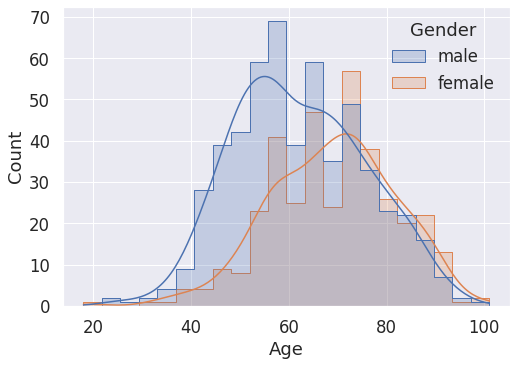

In [ ]:
# df_final.groupby('Gender').Age.hist()
# sns.histplot(df_final, x="Age", hue="Gender")
sns.histplot(df_final, x="Age", hue="Gender", element="step", kde=True)

In [ ]:
# string len
df_final['Record_length']  = df_train['入院情况'].str.len()

<AxesSubplot:xlabel='Record_length', ylabel='Count'>

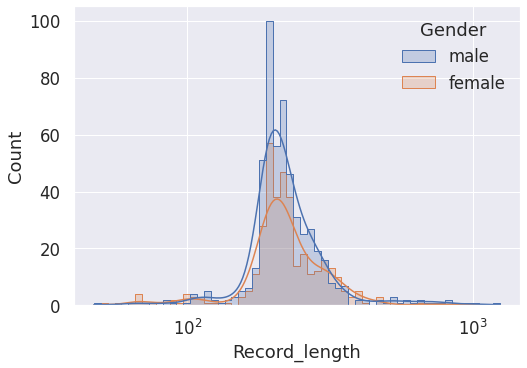

In [ ]:
sns.histplot(df_final, x="Record_length", element="step", kde=True, log_scale=True, hue="Gender")


# note_复方血栓通胶囊

Index(['住院序号本次住院就诊编码', 'Text', 'Feature0', 'Feature1', 'Feature2', 'Feature3',
       'Feature4', 'Feature5', 'Feature6', 'Feature7', 'note_复方血栓通胶囊',
       'note_注射剂', 'diag_冠状动脉粥样硬化性心脏病', 'diag_后循环缺血', 'diag_大脑动脉粥样硬化',
       'diag_颈内动脉粥样硬化', 'diag_颈动脉硬化', 'diag_高脂血症', 'diag_视网膜病变',
       'diag_视网膜动静脉阻塞', '入院时间', '出院时间', '性别', '出生年月', '入院科室', '出院科室'],
      dtype='object')

In [ ]:
df_final.columns

Index(['Code', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4',
       'Feature5', 'Feature6', 'Feature7', 'note_复方血栓通胶囊', 'note_注射剂',
       'diag_冠状动脉粥样硬化性心脏病', 'diag_后循环缺血', 'diag_大脑动脉粥样硬化', 'diag_颈内动脉粥样硬化',
       'diag_颈动脉硬化', 'diag_高脂血症', 'diag_视网膜病变', 'diag_视网膜动静脉阻塞', 'AdmissionT',
       'DischargeT', 'Gender', 'Age', 'Dept1', 'Dept2'],
      dtype='object')

In [ ]:
# note_复方血栓通胶囊
df = df_final[['note_复方血栓通胶囊', 'Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Gender', 'Age']]


In [ ]:
exp = setup(data = df, target = 'note_复方血栓通胶囊', 
            categorical_features=['Gender'],
            # session_id=123, fix_imbalance=True, normalize=True, transformation=True,
            # session_id=123, fix_imbalance=True, transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            session_id=123, fix_imbalance=True,transformation=True,remove_outliers=True,create_clusters=True,polynomial_features=True,
            # session_id=123, fix_imbalance=True,
            # session_id=123, 
            fold=5)

In [ ]:
top10 = compare_models(n_select = 10, sort="MCC") 
# top10 = compare_models(n_select = 10, sort="Accuracy") 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7429,0.0000,0.7400,0.9402,0.8278,0.3466,0.3895,0.020
lda,Linear Discriminant Analysis,0.7429,0.7814,0.7400,0.9402,0.8278,0.3466,0.3895,0.022
lr,Logistic Regression,0.7463,0.7799,0.7460,0.9383,0.8309,0.3472,0.3877,1.474
knn,K Neighbors Classifier,0.6733,0.6998,0.6766,0.9111,0.7757,0.2161,0.2547,0.148
qda,Quadratic Discriminant Analysis,0.7147,0.6718,0.7479,0.8948,0.8135,0.2176,0.2374,0.026
catboost,CatBoost Classifier,0.7927,0.7372,0.8809,0.8725,0.8766,0.2270,0.2272,4.278
nb,Naive Bayes,0.6632,0.6965,0.6724,0.9010,0.7677,0.1902,0.2231,0.022
svm,SVM - Linear Kernel,0.6530,0.0000,0.6623,0.9027,0.7495,0.1829,0.2210,0.022
dt,Decision Tree Classifier,0.7463,0.6214,0.8076,0.8794,0.8417,0.2066,0.2124,0.026
et,Extra Trees Classifier,0.8060,0.7268,0.9107,0.8644,0.8869,0.2072,0.2117,0.552


In [ ]:
for m in top10:
    predict_model(m)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7546,0.6793,0.7904,0.905,0.8438,0.2832,0.2979


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7582,0.7464,0.7948,0.9055,0.8465,0.2887,0.3028


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7582,0.7591,0.7948,0.9055,0.8465,0.2887,0.3028


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6813,0.6869,0.6987,0.8989,0.7862,0.1972,0.2235


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.7729,0.7064,0.8079,0.9113,0.8565,0.3219,0.3358


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8132,0.7499,0.8952,0.8836,0.8894,0.2895,0.2898


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.685,0.6019,0.7205,0.8824,0.7933,0.1592,0.1746


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.707,0.6876,0.7162,0.9162,0.8039,0.2572,0.2904


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7546,0.615,0.821,0.8785,0.8488,0.2022,0.2055


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8132,0.738,0.9127,0.8708,0.8913,0.2315,0.2347


In [ ]:
t0 = tune_model(top5[1], optimize = 'MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7521,0.7119,0.7624,0.9277,0.8370,0.3398,0.3700
1,0.7603,0.8376,0.7525,0.9500,0.8398,0.3888,0.4336
2,0.7025,0.6871,0.7228,0.9012,0.8022,0.2304,0.2549
3,0.7750,0.8030,0.7525,0.9744,0.8492,0.4340,0.4953
4,0.7333,0.8700,0.7200,0.9474,0.8182,0.3514,0.4021
Mean,0.7446,0.7819,0.7420,0.9401,0.8293,0.3488,0.3912
Std,0.0250,0.0710,0.0173,0.0244,0.0169,0.0678,0.0797


In [ ]:
predict_model(top5[4])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.7729,0.7064,0.8079,0.9113,0.8565,0.3219,0.3358


,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Age_Power2,Feature1_Power2,Gender_female,data_cluster_1,note_复方血栓通胶囊,Label,Score
0,-1.488586,0.803966,-0.726933,-0.487963,-0.893356,0.270992,-0.408762,-0.021465,0.985291,-0.155635,1.0,1.0,1,0,0.9671
1,-0.376033,0.210782,-0.125537,-0.211364,0.940512,-0.065870,-0.139384,-0.257017,0.543870,-0.333170,1.0,1.0,1,1,0.6860
2,-0.918751,0.442639,-0.177789,-0.066831,-0.563928,0.494800,-0.877141,0.146383,1.424402,-0.214813,1.0,1.0,1,0,0.9812
3,1.057031,-0.317791,0.133715,1.013156,1.383333,-1.693570,0.436917,-0.321259,1.715948,-0.333170,0.0,1.0,0,1,0.6309
4,0.601747,1.249910,-1.363295,0.215339,-0.083512,0.671671,-0.265579,-0.021465,-1.630231,0.199436,0.0,0.0,1,1,0.9656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,-0.360345,-0.056140,0.022765,-0.478211,0.722508,-0.029125,-0.335958,-0.489000,-0.947159,-0.333170,0.0,0.0,1,0,0.7566
269,0.725275,-0.986670,-0.594775,-0.536756,-0.185086,0.351913,-0.408762,1.718252,-1.859994,-0.037278,0.0,0.0,1,1,0.9986
270,-0.377891,0.278111,-0.338325,0.367234,-0.509023,0.820509,0.724349,-0.157086,-0.272106,-0.333170,0.0,0.0,1,1,0.9318
271,0.649194,0.423108,-1.010280,-0.796721,-1.780066,0.098855,-0.209762,-1.359830,-2.323125,-0.214813,1.0,0.0,0,1,1.0000


In [ ]:
# evaluate_model(t0)
evaluate_model(top5[0])
# evaluate_model(top5[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(top5[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8095,0.7424,0.9083,0.8703,0.8889,0.2243,0.2269


,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Age,Gender_female,note_复方血栓通胶囊,Label,Score
0,-1.031232,0.753132,-0.728005,-0.496572,-0.896654,0.238429,-0.404991,-0.025440,0.985886,1.0,1,0,0.57
1,-0.455450,0.144121,-0.184379,-0.226173,0.941969,-0.097286,-0.134478,-0.247140,0.539407,1.0,1,1,0.73
2,-0.759747,0.376640,-0.232759,-0.082661,-0.560578,0.467858,-0.876699,0.141547,1.432364,1.0,1,0,0.58
3,0.760338,-0.361398,0.063432,1.004891,1.379777,-1.628468,0.438179,-0.312748,1.730016,0.0,0,1,0.54
4,0.276497,1.244170,-1.264125,0.195893,-0.080448,0.652304,-0.271456,-0.006752,-1.618572,0.0,1,1,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,-0.445823,-0.115240,-0.043872,-0.489360,0.723816,-0.062930,-0.342241,-0.475770,-0.948855,0.0,1,1,0.78
269,0.395185,-0.957753,-0.611950,-0.543364,-0.186283,0.317879,-0.416840,1.722740,-1.841812,0.0,1,1,0.86
270,-0.456578,0.210957,-0.381201,0.351799,-0.512079,0.802768,0.719386,-0.138673,-0.279137,0.0,1,1,0.62
271,0.321139,0.356806,-0.971106,-0.799138,-1.781018,0.067013,-0.203142,-1.362081,-2.288290,1.0,0,1,0.78


In [ ]:
blend_m = blend_models(estimator_list = top5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7851,0.7317,0.8713,0.8713,0.8713,0.2213,0.2213
1,0.8512,0.7644,0.9406,0.8879,0.9135,0.3872,0.3955
2,0.7603,0.6465,0.8911,0.8333,0.8612,-0.0104,-0.0107
3,0.7667,0.7467,0.8515,0.8687,0.8600,0.1604,0.1607
4,0.8250,0.7790,0.9100,0.8835,0.8966,0.3298,0.3313
Mean,0.7977,0.7337,0.8929,0.8689,0.8805,0.2177,0.2196
Std,0.0350,0.0464,0.0308,0.0192,0.0211,0.1390,0.1414


In [ ]:
predict_model(stack_1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8388,0.7474,0.9694,0.8571,0.9098,0.1774,0.2142


,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Age_Power2,Feature1_Power2,Gender_female,data_cluster_1,note_复方血栓通胶囊,Label,Score
0,-1.488586,0.803966,-0.726933,-0.487963,-0.893356,0.270992,-0.408762,-0.021465,0.985291,-0.155635,1.0,1.0,1,1,0.66
1,-0.376033,0.210782,-0.125537,-0.211364,0.940512,-0.065870,-0.139384,-0.257017,0.543870,-0.333170,1.0,1.0,1,1,0.99
2,-0.918751,0.442639,-0.177789,-0.066831,-0.563928,0.494800,-0.877141,0.146383,1.424402,-0.214813,1.0,1.0,1,0,0.68
3,1.057031,-0.317791,0.133715,1.013156,1.383333,-1.693570,0.436917,-0.321259,1.715948,-0.333170,0.0,1.0,0,1,0.81
4,0.601747,1.249910,-1.363295,0.215339,-0.083512,0.671671,-0.265579,-0.021465,-1.630231,0.199436,0.0,0.0,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,-0.360345,-0.056140,0.022765,-0.478211,0.722508,-0.029125,-0.335958,-0.489000,-0.947159,-0.333170,0.0,0.0,1,1,0.89
269,0.725275,-0.986670,-0.594775,-0.536756,-0.185086,0.351913,-0.408762,1.718252,-1.859994,-0.037278,0.0,0.0,1,1,0.97
270,-0.377891,0.278111,-0.338325,0.367234,-0.509023,0.820509,0.724349,-0.157086,-0.272106,-0.333170,0.0,0.0,1,1,0.93
271,0.649194,0.423108,-1.010280,-0.796721,-1.780066,0.098855,-0.209762,-1.359830,-2.323125,-0.214813,1.0,0.0,0,1,0.97


In [ ]:
evaluate_model(stack_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
stack_1 = stack_models(top5, meta_model = top5[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8017,0.7178,0.9307,0.8468,0.8868,0.1009,0.1089
1,0.8430,0.8017,0.9703,0.8596,0.9116,0.2303,0.2709
2,0.8099,0.6166,0.9604,0.8362,0.8940,0.0149,0.0194
3,0.8083,0.7608,0.9307,0.8545,0.8910,0.1097,0.1170
4,0.8167,0.6890,0.9600,0.8421,0.8972,0.0833,0.1026
Mean,0.8159,0.7172,0.9504,0.8479,0.8961,0.1078,0.1238
Std,0.0144,0.0632,0.0165,0.0084,0.0085,0.0697,0.0816
